<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n20.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.220307,34.845144,70.980832,-0.001124,157.045160,157.047094,-0.001934
1,0.0,1.0,36.201327,80.620682,71.236271,0.000834,198.059113,198.055859,0.003254
2,0.0,2.0,94.022741,32.397588,20.031061,0.003119,156.454509,156.453938,0.000571
3,0.0,3.0,55.245305,31.697141,41.518498,-0.004750,138.456194,138.461183,-0.004989
4,0.0,4.0,91.982932,61.713872,40.328161,0.001071,204.026036,204.027058,-0.001022
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.894108,57.189120,73.572637,0.002114,172.657979,172.656093,0.001886
19996,999.0,16.0,46.640474,67.302312,95.345620,-0.002190,219.286216,219.288926,-0.002710
19997,999.0,17.0,22.994239,60.861809,88.005442,0.001471,181.862961,181.862321,0.000640
19998,999.0,18.0,31.331489,66.317986,26.704789,-0.000860,134.353405,134.353876,-0.000471


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.220307,34.845144,70.980832,-0.001124,157.045160,157.047094,-0.001934
1,0.0,1.0,36.201327,80.620682,71.236271,0.000834,198.059113,198.055859,0.003254
2,0.0,2.0,94.022741,32.397588,20.031061,0.003119,156.454509,156.453938,0.000571
3,0.0,3.0,55.245305,31.697141,41.518498,-0.004750,138.456194,138.461183,-0.004989
4,0.0,4.0,91.982932,61.713872,40.328161,0.001071,204.026036,204.027058,-0.001022
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.894108,57.189120,73.572637,0.002114,172.657979,172.656093,0.001886
19996,999.0,16.0,46.640474,67.302312,95.345620,-0.002190,219.286216,219.288926,-0.002710
19997,999.0,17.0,22.994239,60.861809,88.005442,0.001471,181.862961,181.862321,0.000640
19998,999.0,18.0,31.331489,66.317986,26.704789,-0.000860,134.353405,134.353876,-0.000471


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.220307  34.845144  70.980832  ...  157.045160  157.047094 -0.001934
      1.0    36.201327  80.620682  71.236271  ...  198.059113  198.055859  0.003254
      2.0    94.022741  32.397588  20.031061  ...  156.454509  156.453938  0.000571
      3.0    55.245305  31.697141  41.518498  ...  138.456194  138.461183 -0.004989
      4.0    91.982932  61.713872  40.328161  ...  204.026036  204.027058 -0.001022
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   31.894108  57.189120  73.572637  ...  172.657979  172.656093  0.001886
      16.0   46.640474  67.302312  95.345620  ...  219.286216  219.288926 -0.002710
      17.0   22.994239  60.861809  88.005442  ...  181.862961  181.862321  0.000640
      18.0   31.331489  66.317986  26.704789  ...  134.353405  134.353876 -0.000471
      19.0   41.450043  90.165272  79.599283  ...  221.214299  221.215575 -0.001276

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.220307  34.845144  70.980832  ...  157.045160  157.047094 -0.001934
      1.0    36.201327  80.620682  71.236271  ...  198.059113  198.055859  0.003254
      2.0    94.022741  32.397588  20.031061  ...  156.454509  156.453938  0.000571
      3.0    55.245305  31.697141  41.518498  ...  138.456194  138.461183 -0.004989
      4.0    91.982932  61.713872  40.328161  ...  204.026036  204.027058 -0.001022
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   31.894108  57.189120  73.572637  ...  172.657979  172.656093  0.001886
      16.0   46.640474  67.302312  95.345620  ...  219.286216  219.288926 -0.002710
      17.0   22.994239  60.861809  88.005442  ...  181.862961  181.862321  0.000640
      18.0   31.331489  66.317986  26.704789  ...  134.353405  134.353876 -0.000471
      19.0   41.450043  90.165272  79.599283  ...  221.214299  221.215575 -0.001276

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.220307,34.845144,70.980832,-0.001124,157.045160,157.047094,-0.001934
1,0.0,1.0,36.201327,80.620682,71.236271,0.000834,198.059113,198.055859,0.003254
2,0.0,2.0,94.022741,32.397588,20.031061,0.003119,156.454509,156.453938,0.000571
3,0.0,3.0,55.245305,31.697141,41.518498,-0.004750,138.456194,138.461183,-0.004989
4,0.0,4.0,91.982932,61.713872,40.328161,0.001071,204.026036,204.027058,-0.001022
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.894108,57.189120,73.572637,0.002114,172.657979,172.656093,0.001886
19996,999.0,16.0,46.640474,67.302312,95.345620,-0.002190,219.286216,219.288926,-0.002710
19997,999.0,17.0,22.994239,60.861809,88.005442,0.001471,181.862961,181.862321,0.000640
19998,999.0,18.0,31.331489,66.317986,26.704789,-0.000860,134.353405,134.353876,-0.000471


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.220307  34.845144  70.980832  ...  157.045160  157.047094 -0.001934
      1.0    36.201327  80.620682  71.236271  ...  198.059113  198.055859  0.003254
      2.0    94.022741  32.397588  20.031061  ...  156.454509  156.453938  0.000571
      3.0    55.245305  31.697141  41.518498  ...  138.456194  138.461183 -0.004989
      4.0    91.982932  61.713872  40.328161  ...  204.026036  204.027058 -0.001022
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   31.894108  57.189120  73.572637  ...  172.657979  172.656093  0.001886
      16.0   46.640474  67.302312  95.345620  ...  219.286216  219.288926 -0.002710
      17.0   22.994239  60.861809  88.005442  ...  181.862961  181.862321  0.000640
      18.0   31.331489  66.317986  26.704789  ...  134.353405  134.353876 -0.000471
      19.0   41.450043  90.165272  79.599283  ...  221.214299  221.215575 -0.001276

[20000 rows x 7 columns]

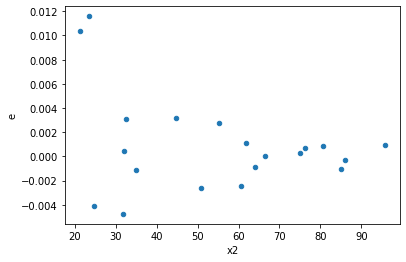

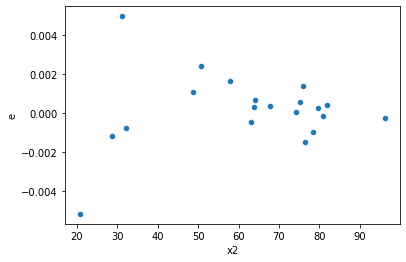

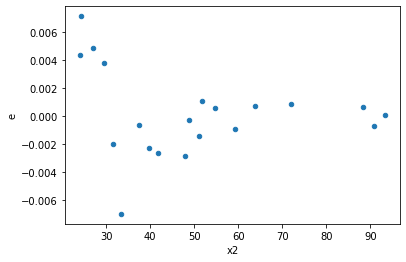

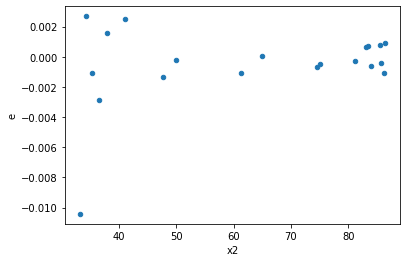

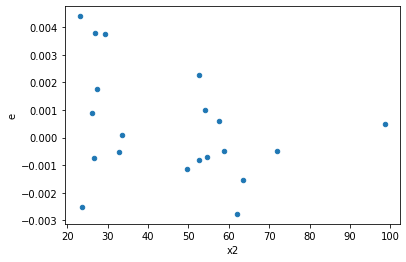

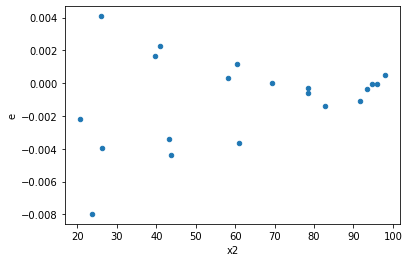

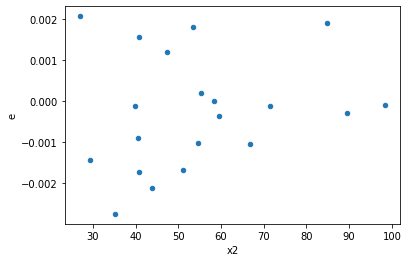

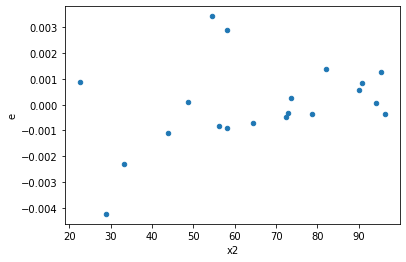

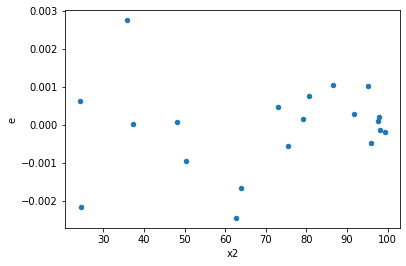

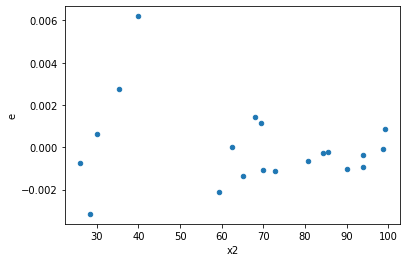

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
59.0,5.0,5.0,1.896223720081238e-05,1.105208426077563e-05,4.740559300203095e-06,2.7630210651939076e-06,1.71571594582483,0.5679649914129341,0.716017504293533,Reject001=1 : Homoscedasticity
82.0,5.0,5.0,8.267796129737075e-06,8.19871575110896e-06,2.0669490324342688e-06,2.04967893777724e-06,1.0084257560238956,0.9928780629459375,0.5035609685270312,Reject001=1 : Homoscedasticity
171.0,5.0,5.0,3.833161557018571e-06,1.2849984751027689e-06,9.582903892546428e-07,3.212496187756922e-07,2.9830086426460634,0.25552695425767125,0.8722365228711644,Reject001=1 : Homoscedasticity
178.0,5.0,5.0,1.0207067483297276e-05,6.968908976652405e-06,2.551766870824319e-06,1.7422272441631012e-06,1.464657885114229,0.6856017375092358,0.6571991312453821,Reject001=1 : Homoscedasticity
211.0,5.0,5.0,4.257522842454547e-06,3.182230699036483e-06,1.0643807106136367e-06,7.955576747591207e-07,1.3379051505422412,0.7571874422588332,0.6214062788705834,Reject001=1 : Homoscedasticity
252.0,5.0,5.0,4.1067607483963095e-06,4.094601432958649e-06,1.0266901870990774e-06,1.0236503582396622e-06,1.0029695968305454,0.9974830678295201,0.5012584660852399,Reject001=1 : Homoscedasticity
407.0,5.0,5.0,1.0814435970127489e-05,3.6655659394909453e-06,2.703608992531872e-06,9.163914848727363e-07,2.9502772965064548,0.2601532029179674,0.8699233985410163,Reject001=1 : Homoscedasticity
619.0,5.0,5.0,3.0565660548412583e-06,1.0959110722213698e-06,7.641415137103146e-07,2.7397776805534246e-07,2.7890639416989518,0.28470581646871684,0.8576470917656416,Reject001=1 : Homoscedasticity
664.0,5.0,5.0,3.2206414802805723e-06,2.1481189086940815e-06,8.051603700701431e-07,5.370297271735204e-07,1.499284544838589,0.6675848412511716,0.6662075793744142,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,4.942094741118649e-07,3.0682984031241964e-05,1.2355236852796623e-07,7.670746007810491e-06,0.016106956012122288,0.0003379074448818733,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,2.1887131659416483e-06,1.533489566204917e-05,5.471782914854121e-07,3.833723915512292e-06,0.14272762033577313,0.052084005831688776,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,3.119961880267992e-06,5.597016282420895e-05,7.79990470066998e-07,1.3992540706052238e-05,0.055743305411977556,0.006570418279729533,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,1.013555581010023e-06,0.00010346750075194943,2.5338889525250575e-07,2.5866875187987358e-05,0.009795883476879347,9.966092191185539e-05,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,8.969357874745678e-06,2.4874944285437345e-05,2.2423394686864195e-06,6.218736071359336e-06,0.36057800861072287,0.2872711876840142,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,1.6795664482931992e-06,0.00010860472868054497,4.198916120732998e-07,2.7151182170136243e-05,0.01546494769333253,0.00030592436149706753,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,2.319458355404339e-06,1.9165711734696014e-05,5.798645888510848e-07,4.791427933674004e-06,0.12102124812852028,0.036895450851624274,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,2.7998577222538344e-06,2.750475936277734e-05,6.999644305634586e-07,6.876189840694335e-06,0.10179539058403578,0.025450357194184547,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,6.332425865392265e-07,1.604041944656028e-05,1.5831064663480663e-07,4.01010486164007e-06,0.03947793189878332,0.002930702328612527,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    503
Reject001=1 : Homoscedasticity      497
Name: Result_test, dtype: int64